# ECE 271A HW2

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.fftpack import dct
from numpy.linalg import inv,det

# a)

In [2]:
train_samples = loadmat('./data/TrainingSamplesDCT_8_new.mat')

In [3]:
print(train_samples.keys())

dict_keys(['__header__', '__version__', '__globals__', 'TrainsampleDCT_FG', 'TrainsampleDCT_BG'])


In [4]:
train_samples_fg = train_samples['TrainsampleDCT_FG']
train_samples_bg = train_samples['TrainsampleDCT_BG']
print(train_samples_fg.shape)
print(train_samples_bg.shape)

(250, 64)
(1053, 64)


In [5]:
bgfg = train_samples_fg.shape[0] + train_samples_bg.shape[0]
p_cheetah = train_samples_fg.shape[0] / bgfg
p_grass = train_samples_bg.shape[0] / bgfg
print('P(cheetah) = {}'.format(p_cheetah))
print('P(grass) = {}'.format(p_grass))

P(cheetah) = 0.1918649270913277
P(grass) = 0.8081350729086723


From problem 2, we realize that the MLE of the priors are the same as the our intuitive priors from HW1. $P(cheetah) = E[\frac{C_{i}}{n}] = \frac{1}{n}E[C_{i}]$, $P(grass) = E[\frac{C_{j}}{n}] = \frac{1}{n}E[C_{j}]$

# b)

In [6]:
fg_mean = np.mean(train_samples_fg, axis=0)
bg_mean = np.mean(train_samples_bg, axis=0)
fg_var = np.var(train_samples_fg, axis=0)
bg_var = np.var(train_samples_bg, axis=0)
fg_cov = np.cov(train_samples_fg.T)
bg_cov = np.cov(train_samples_bg.T)

Multivariate Gaussians Distribution is in the exponential family and hence the MLE for the parameters are simply sample-mean, sample-varience, and sample-covariance.

In [7]:
def gaussian(x, mu, var):
    return 1/(np.sqrt(var*2*np.pi))*np.exp(-np.power((x - mu), 2)/(2*var))

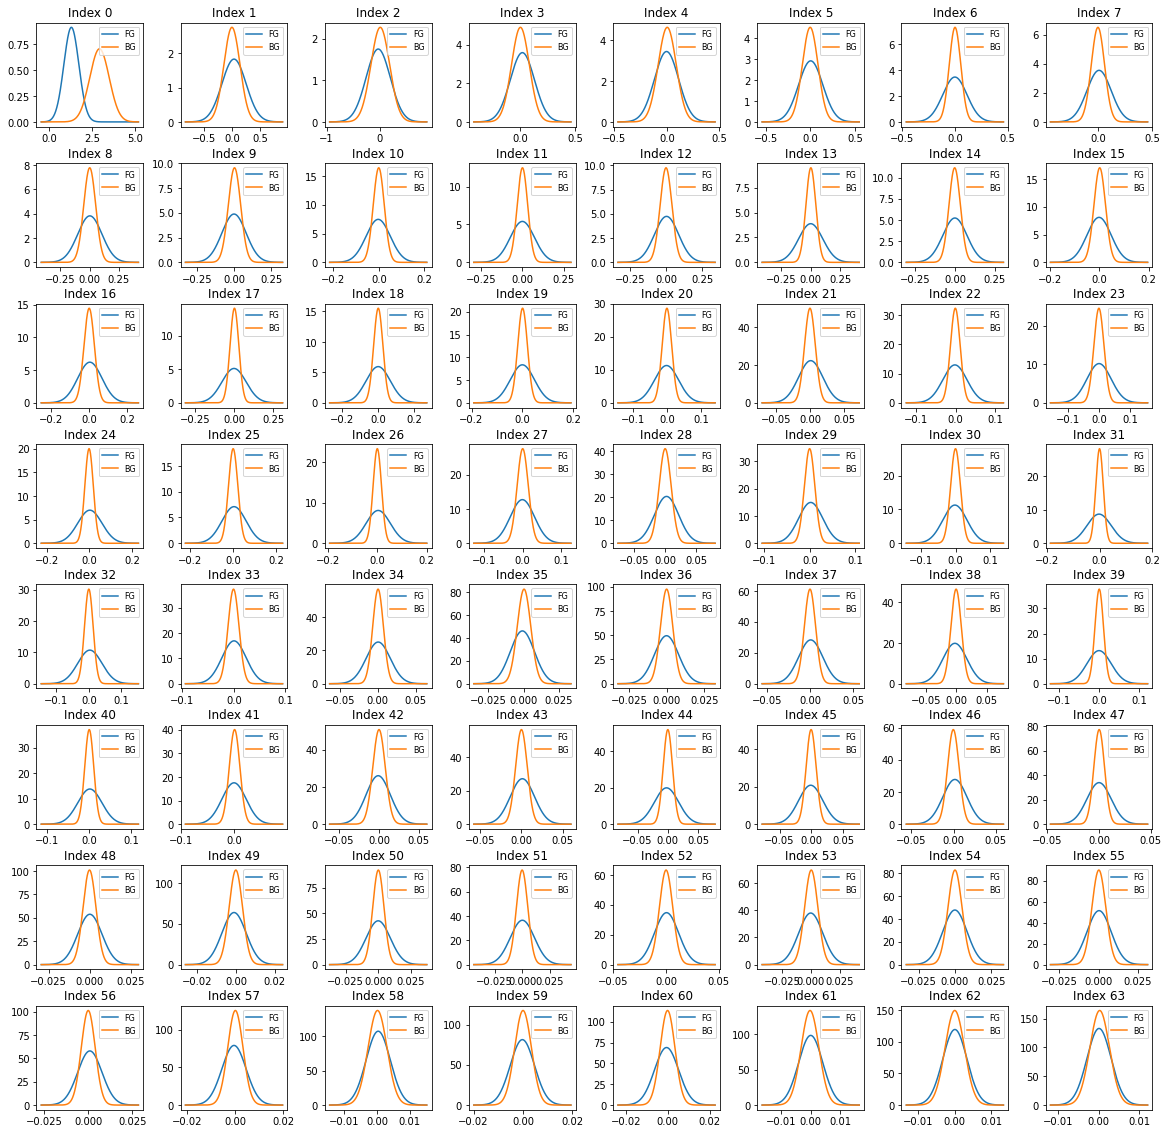

In [8]:
plt.figure(figsize=(20, 20))
for i in range(64):
    lower_bound = np.amin([fg_mean[i]-4*np.sqrt(fg_var[i]), bg_mean[i]-4*np.sqrt(bg_var[i])])
    upper_bound = np.amax([fg_mean[i]+4*np.sqrt(fg_var[i]), bg_mean[i]+4*np.sqrt(bg_var[i])])
    interval = np.linspace(lower_bound, upper_bound, 1000)
    plt.subplot(8, 8, i+1)
    plt.subplots_adjust(wspace=0.35, hspace=0.35)
    plt.plot(interval, gaussian(interval, fg_mean[i], fg_var[i]), label='FG')
    plt.plot(interval, gaussian(interval, bg_mean[i], bg_var[i]), label='BG')
    plt.title('Index {}'.format(i))
    plt.legend(loc='upper right', prop={'size': 8})
plt.show()

Best 8 Features:


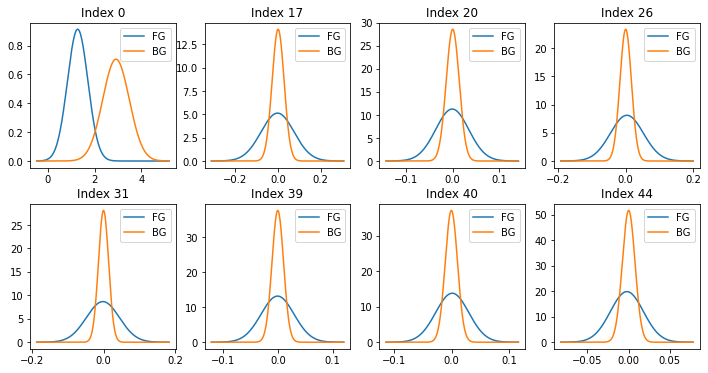

Worst 8 Features:


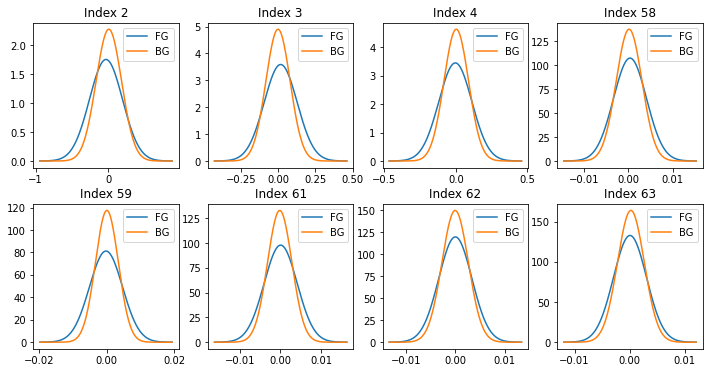

In [9]:
# best = [0, 6, 17, 20, 26, 31, 32, 39]   # best 8 features
# best = [0, 17, 24, 26, 31, 37, 39, 41]   # best 8 features
# best = [0, 17, 20, 22, 31, 39, 40, 44]   # best 8 features
best = [0, 17, 20, 26, 31, 39, 40, 44]   # best 8 features
worst = [2, 3, 4, 58, 59, 61, 62, 63]     # worst 8 features
print('Best 8 Features:')
plt.figure(figsize=(12, 6))
for count, i in enumerate(best):
    # set bounds to be 4 std away from max and min
    lower_bound = np.amin([fg_mean[i]-4*np.sqrt(fg_var[i]), bg_mean[i]-4*np.sqrt(bg_var[i])])
    upper_bound = np.amax([fg_mean[i]+4*np.sqrt(fg_var[i]), bg_mean[i]+4*np.sqrt(bg_var[i])])
    interval = np.linspace(lower_bound, upper_bound, 1000)
    plt.subplot(2, 4, count+1)
    plt.subplots_adjust(hspace=0.25)
    plt.plot(interval, gaussian(interval, fg_mean[i], fg_var[i]), label='FG')
    plt.plot(interval, gaussian(interval, bg_mean[i], bg_var[i]), label='BG')
    plt.title('Index {}'.format(i))
    plt.legend(loc='upper right')
plt.show()

print('Worst 8 Features:')
plt.figure(figsize=(12, 6))
for count, i in enumerate(worst):
    # set bounds to be 4 std away from max and min
    lower_bound = np.amin([fg_mean[i]-4*np.sqrt(fg_var[i]), bg_mean[i]-4*np.sqrt(bg_var[i])])
    upper_bound = np.amax([fg_mean[i]+4*np.sqrt(fg_var[i]), bg_mean[i]+4*np.sqrt(bg_var[i])])
    interval = np.linspace(lower_bound, upper_bound, 1000)
    plt.subplot(2, 4, count+1)
    plt.subplots_adjust(hspace=0.25)
    plt.plot(interval, gaussian(interval, fg_mean[i], fg_var[i]), label='FG')
    plt.plot(interval, gaussian(interval, bg_mean[i], bg_var[i]), label='BG')
    plt.title('Index {}'.format(i))
    plt.legend(loc='upper right')
plt.show()

Best features are selected visually based on the least overlaps between the two curves while the worst features are selected visually based on the most overlaps between the two curves.

# c)

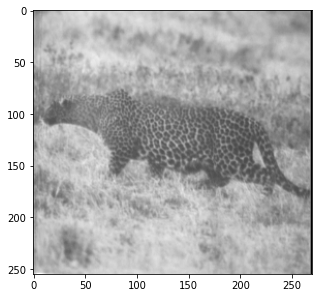

In [22]:
image = np.array(imageio.imread('./data/cheetah.bmp'), dtype=np.float64)/255
plt.figure(figsize=(5,5))
plt.imshow(image, cmap='gray')
plt.show()

In [11]:
padded_image = np.pad(image, 4, mode='constant', constant_values=0.8)
print(image.shape)
print(padded_image.shape)

(255, 270)
(263, 278)


In [12]:
zig_zag = np.genfromtxt('./data/zig_zag_pattern.txt', dtype=np.int64).flatten()
print(zig_zag)

[ 0  1  5  6 14 15 27 28  2  4  7 13 16 26 29 42  3  8 12 17 25 30 41 43
  9 11 18 24 31 40 44 53 10 19 23 32 39 45 52 54 20 22 33 38 46 51 55 60
 21 34 37 47 50 56 59 61 35 36 48 49 57 58 62 63]


In [13]:
def zz_scan(block):
    scanned = np.zeros(64)
    for i in range(64):
        scanned[zig_zag[i]] = block[i]
    return scanned

In [14]:
def bdr(difference, inverse, determinant, prior):
    d = (difference.T.dot(inverse)).dot(difference)
    a = np.log((2*np.pi)**64*determinant) - 2*np.log(prior)
    return d + a

In [15]:
fg_inverse = inv(fg_cov)
bg_inverse = inv(bg_cov)
fg_determinant = det(fg_cov)
bg_determinant = det(bg_cov)
b8_fg_cov = np.cov(train_samples_fg[:,best].T)
b8_bg_cov = np.cov(train_samples_bg[:,best].T)
b8_fg_inverse = inv(b8_fg_cov)
b8_bg_inverse = inv(b8_bg_cov)
b8_fg_determinant = det(b8_fg_cov)
b8_bg_determinant = det(b8_bg_cov)

A = np.zeros(image.shape)
B = np.zeros(image.shape)
for i in range(image.shape[0]-8):
    for j in range(image.shape[1]-8):
        block = image[i:i+8,j:j+8]
        transformed_block = dct(dct(block.T, norm='ortho').T, norm='ortho').flatten()
        transformed_block = zz_scan(transformed_block)

        fg = bdr((transformed_block-fg_mean)[:,np.newaxis], fg_inverse, fg_determinant, p_cheetah)
        bg = bdr((transformed_block-bg_mean)[:,np.newaxis], bg_inverse, bg_determinant, p_grass)
        A[i+4,j+4] = fg < bg
        
        fg = bdr((transformed_block-fg_mean)[best,np.newaxis], b8_fg_inverse, b8_fg_determinant, p_cheetah)
        bg = bdr((transformed_block-bg_mean)[best,np.newaxis], b8_bg_inverse, b8_bg_determinant, p_grass)
        B[i+4,j+4] = fg < bg

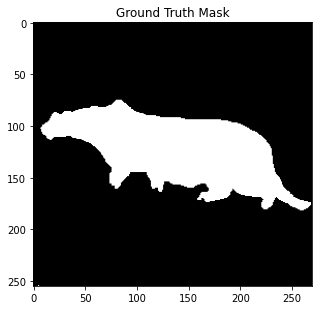

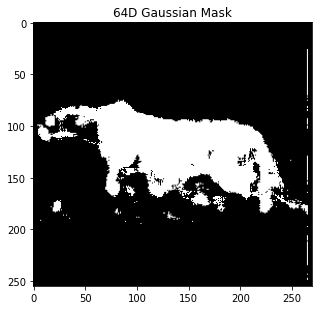

P(64D Gaussian error) = 0.05228758169934641
64D Gaussian accuracy percentage = 0.9477124183006536



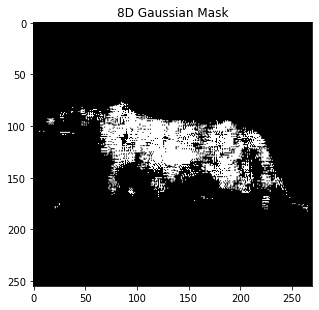

P(8D Gaussian error) = 0.10332607116920843
8D Gaussian accuracy percentage = 0.8966739288307916


In [33]:
ground_truth = np.array(imageio.imread('./data/cheetah_mask.bmp'), dtype=np.float64)/255
plt.figure(figsize=(5,5))
plt.imshow(ground_truth, cmap='gray')
plt.title('Ground Truth Mask')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(A, cmap='gray')
plt.title('64D Gaussian Mask')
plt.show()
error = A != ground_truth
error_sum = np.sum(error)
p_error = error_sum / A.size
print('P(64D Gaussian error) = {}'.format(p_error))
print('64D Gaussian accuracy percentage = {}\n'.format(1-p_error))

plt.figure(figsize=(5,5))
plt.imshow(B, cmap='gray')
plt.title('8D Gaussian Mask')
plt.show()
error = B != ground_truth
error_sum = np.sum(error)
p_error = error_sum / B.size
print('P(8D Gaussian error) = {}'.format(p_error))
print('8D Gaussian accuracy percentage = {}'.format(1-p_error))

The mask generated using the 8 best features is not as good as the mask generated using all 64 features. We see that the error increased about 5%. This is likely due to information loss when choosing the 8 best features. While other features may not classify as well as the 8 features, they still contain valuable information that we can use for classification. This could also mean that the 8 chosen features that were visually determined to be the best are not actually the 8 best features. I tried out a couple other combinations of 8 featueres and the features chosen here seem to perform the best.